In [1]:
import numpy as np
import os, warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings('ignore')

In [3]:
image_shape = (224, 224)
batch_size = 32
epochs = 10
data_path = r'C:/Users/Ania/Desktop/dataset2/archive (1)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_folder = os.path.join(data_path, 'train')
valid_folder = os.path.join(data_path, 'valid')

In [5]:
#przygotowanie danych
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical', subset='training')
valid_data = train_datagen.flow_from_directory(train_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical', subset='validation')
test_data = test_datagen.flow_from_directory(valid_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical')

Found 112488 images belonging to 38 classes.
Found 28102 images belonging to 38 classes.
Found 35144 images belonging to 38 classes.


In [6]:
#budowa modelu ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=predictions)
model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,151,078 (92.13 MB)

 Trainable params: 562,854 (2.15 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

In [13]:
#trenowanie
checkpoint = ModelCheckpoint('resnet50_best.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)

history_resnet = model_resnet.fit(train_data, validation_data=valid_data, epochs=epochs, callbacks=[checkpoint, early_stop])

Epoch 1/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 8549s 2s/step - accuracy: 0.5134 - loss: 1.6421 - val_accuracy: 0.4029 - val_loss: 2.0731
Epoch 2/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 9170s 3s/step - accuracy: 0.5788 - loss: 1.3947 - val_accuracy: 0.4371 - val_loss: 2.0633
Epoch 3/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 8581s 2s/step - accuracy: 0.6109 - loss: 1.2707 - val_accuracy: 0.4652 - val_loss: 1.7985
Epoch 4/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 8651s 2s/step - accuracy: 0.6372 - loss: 1.1863 - val_accuracy: 0.2833 - val_loss: 2.8820
Epoch 5/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 8649s 2s/step - accuracy: 0.6518 - loss: 1.1321 - val_accuracy: 0.4543 - val_loss: 2.0007
Epoch 6/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 8676s 2s/step - accuracy: 0.6615 - loss: 1.0973 - val_accuracy: 0.4318 - val_loss: 2.1732


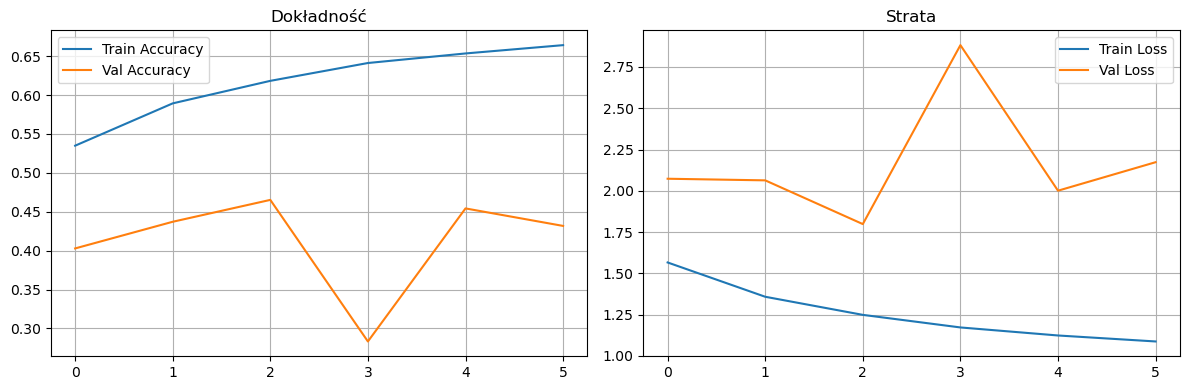

In [15]:
#wykresy uczenia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Dokładność')
plt.legend(), plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('Strata')
plt.legend(), plt.grid()
plt.tight_layout()
plt.show()

In [17]:
#testowanie modelu
resnet_model = tf.keras.models.load_model('resnet50_best.keras')
test_loss, test_acc = resnet_model.evaluate(test_data)
print(f'ResNet50 Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 2174s 2s/step - accuracy: 0.4634 - loss: 1.7809
ResNet50 Test Accuracy: 0.4643, Test Loss: 1.7826


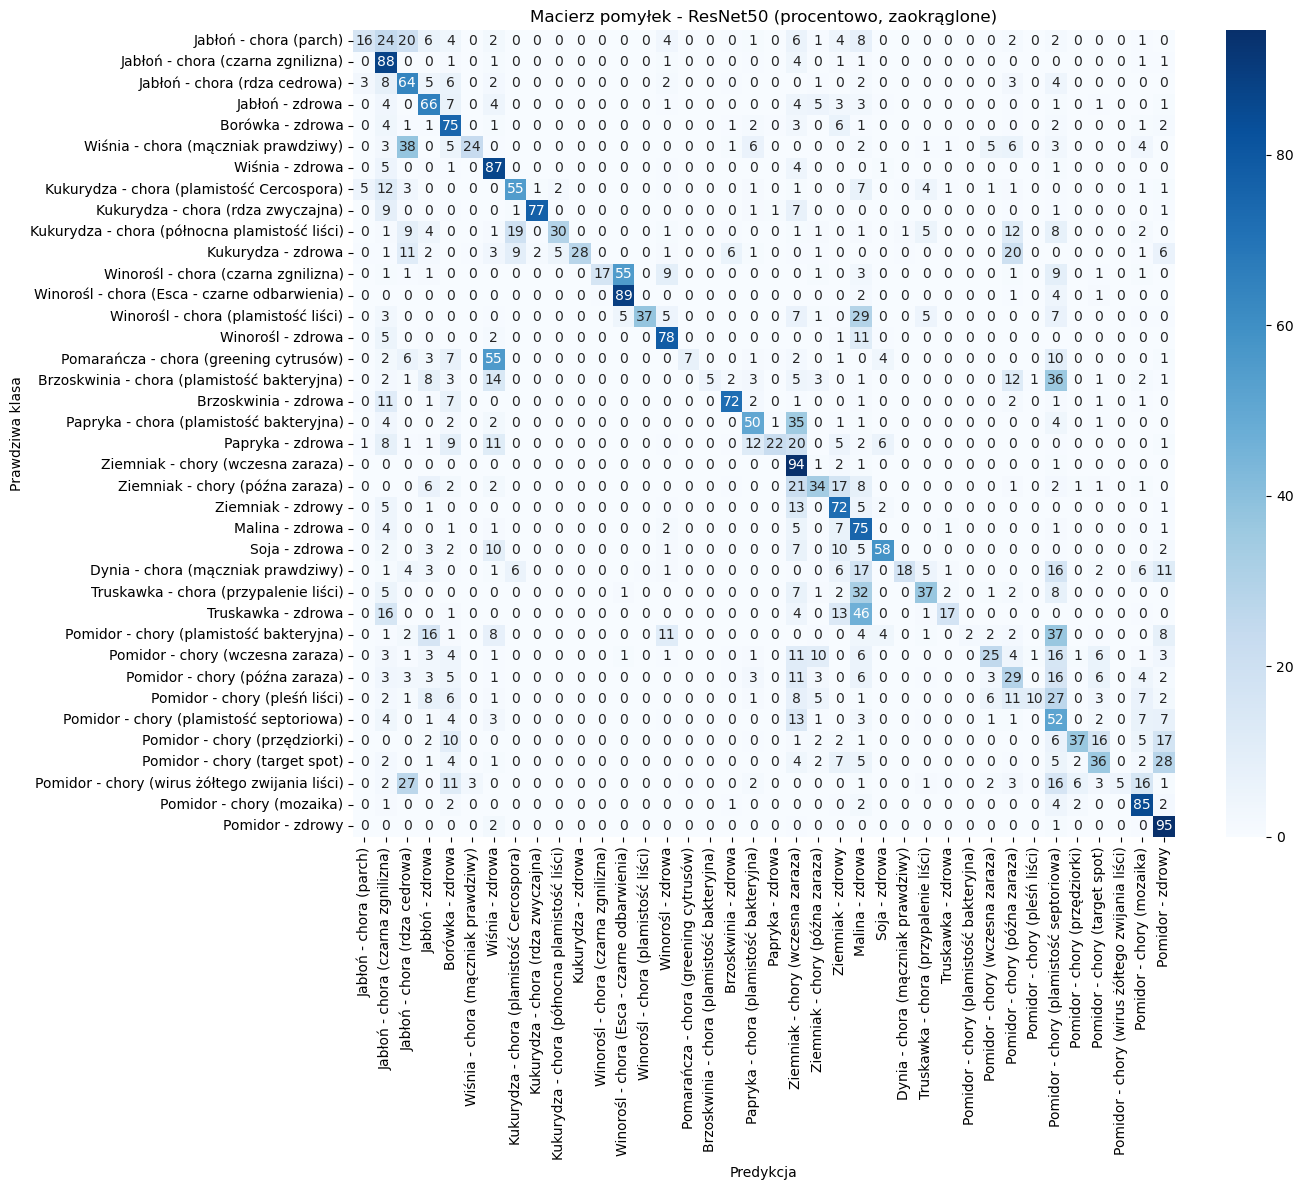

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

#załaduj model
model = load_model("resnet50_best.keras")

#klasy
class_names = [
    'Jabłoń - chora (parch)', 'Jabłoń - chora (czarna zgnilizna)', 'Jabłoń - chora (rdza cedrowa)', 'Jabłoń - zdrowa',
    'Borówka - zdrowa', 'Wiśnia - chora (mączniak prawdziwy)', 'Wiśnia - zdrowa',
    'Kukurydza - chora (plamistość Cercospora)', 'Kukurydza - chora (rdza zwyczajna)',
    'Kukurydza - chora (północna plamistość liści)', 'Kukurydza - zdrowa',
    'Winorośl - chora (czarna zgnilizna)', 'Winorośl - chora (Esca - czarne odbarwienia)',
    'Winorośl - chora (plamistość liści)', 'Winorośl - zdrowa',
    'Pomarańcza - chora (greening cytrusów)', 'Brzoskwinia - chora (plamistość bakteryjna)',
    'Brzoskwinia - zdrowa', 'Papryka - chora (plamistość bakteryjna)', 'Papryka - zdrowa',
    'Ziemniak - chory (wczesna zaraza)', 'Ziemniak - chory (późna zaraza)', 'Ziemniak - zdrowy',
    'Malina - zdrowa', 'Soja - zdrowa', 'Dynia - chora (mączniak prawdziwy)',
    'Truskawka - chora (przypalenie liści)', 'Truskawka - zdrowa',
    'Pomidor - chory (plamistość bakteryjna)', 'Pomidor - chory (wczesna zaraza)', 'Pomidor - chory (późna zaraza)',
    'Pomidor - chory (pleśń liści)', 'Pomidor - chory (plamistość septoriowa)',
    'Pomidor - chory (przędziorki)', 'Pomidor - chory (target spot)',
    'Pomidor - chory (wirus żółtego zwijania liści)', 'Pomidor - chory (mozaika)', 'Pomidor - zdrowy'
]

#przewidywanie batchami
y_true = []
y_pred = []

for i in range(len(test_data)):
    x_batch, y_batch = test_data[i]
    preds = model.predict(x_batch, verbose=0)
    
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

    if (i + 1) * test_data.batch_size >= test_data.samples:
        break

#macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

#normalizowana w % (zaokrąglona)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

#wizualizacja
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Macierz pomyłek - ResNet50 (procentowo, zaokrąglone)")
plt.xlabel("Predykcja")
plt.ylabel("Prawdziwa klasa")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

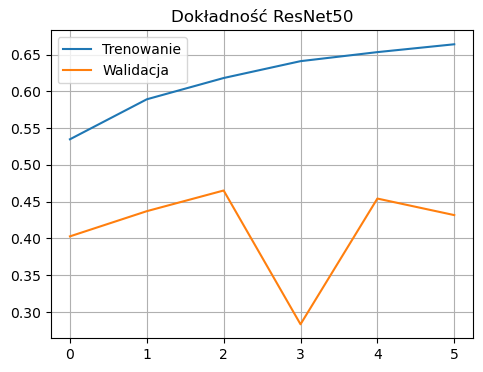

In [25]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Trenowanie')
plt.plot(history_resnet.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność ResNet50')
plt.legend(), plt.grid()

plt.show()